In [31]:

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

### Number of sample in each label

In [5]:
data = pd.read_csv('data.csv')

In [6]:
data = data[data['rating_star'].isin([1, 2, 3])]

In [7]:
data.dropna(inplace=True)

In [8]:
data.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='rating_star', ylabel='count'>

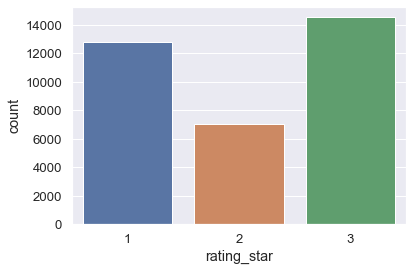

In [9]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(data.rating_star)

#### load stopwords

In [10]:
stopwords = []
with open('stopword.txt','r',encoding="utf8") as f:
    for word in f:
        stopwords.append(word.replace('\n',''))

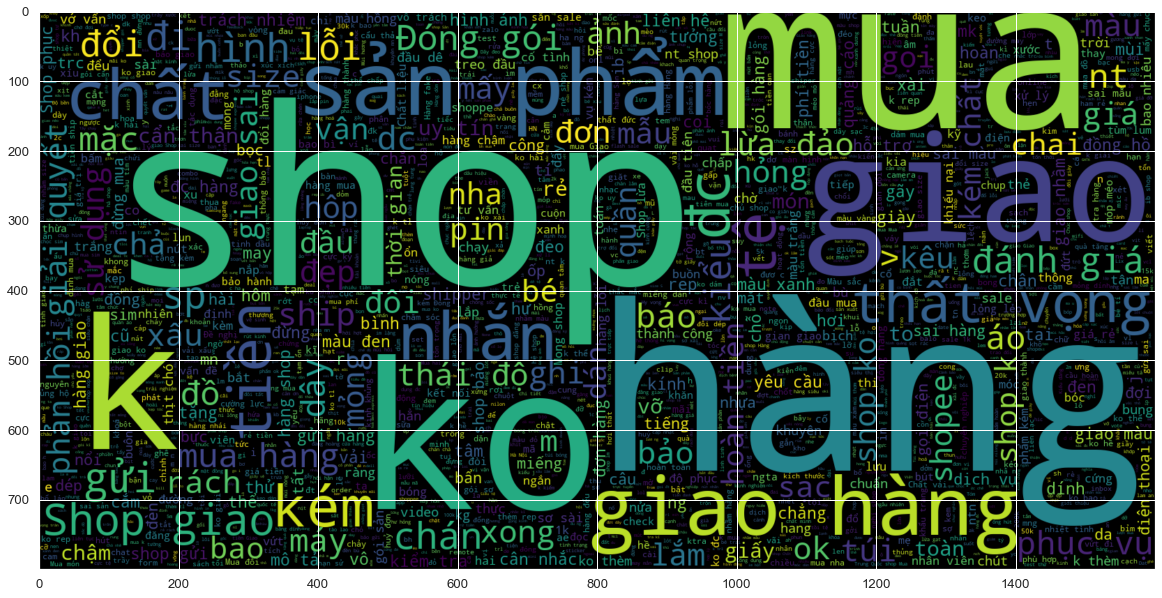

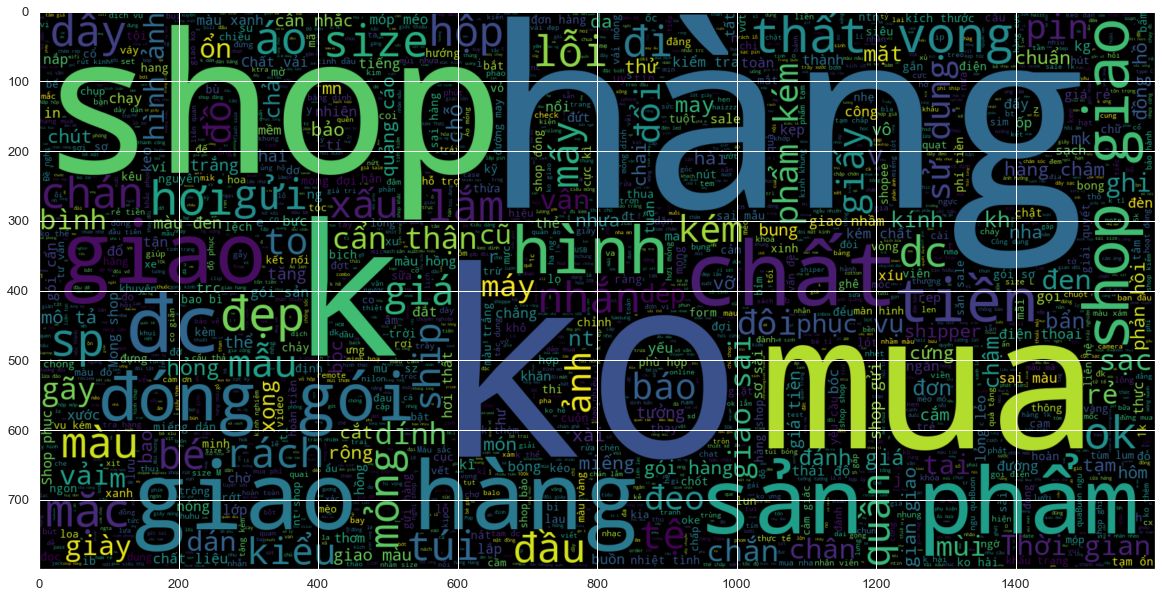

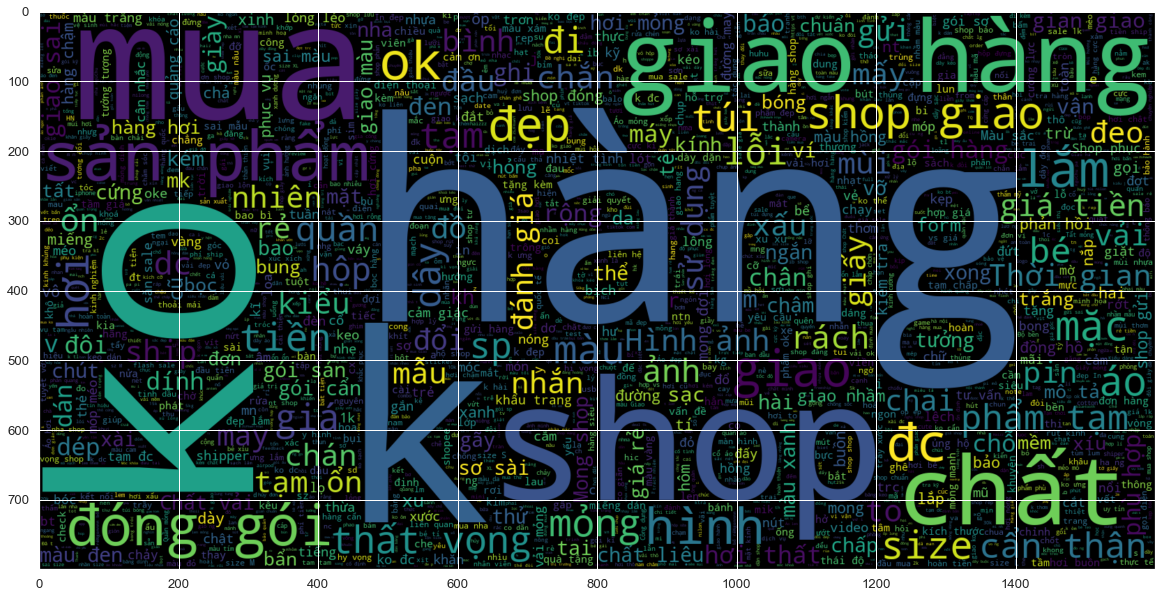

In [11]:
for label in data.rating_star.unique():
    plt.figure(figsize = (20,20)) # Positive Review Text
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800,stopwords=stopwords).generate(" ".join(data[data.rating_star == label].comment))
    plt.imshow(wc , interpolation = 'bilinear')
    plt.savefig(f'img/{label}.png')

In [13]:
data.rating_star.unique()

array([1, 2, 3], dtype=int64)

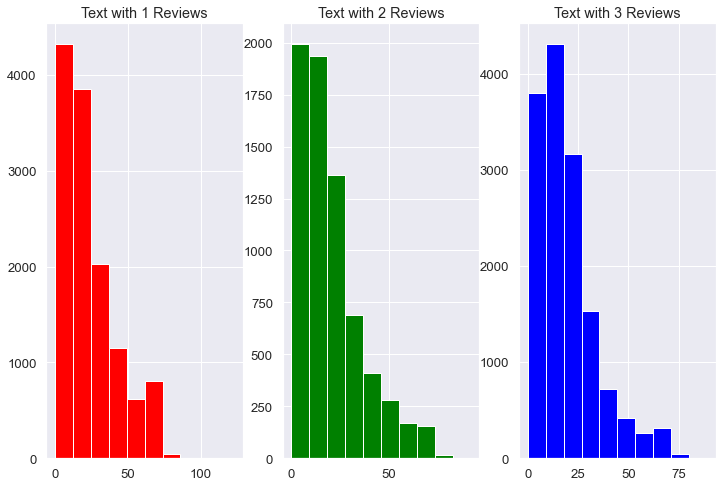

In [14]:
nb_class = len(data.rating_star.unique())
list_color = ['red','green','blue']
fig,ax=plt.subplots(1,nb_class,figsize=(12,8))
for label in data.rating_star.unique():
    text_len=data[data['rating_star']==label]['comment'].str.split().map(lambda x: len(x))
    ax[label-1].hist(text_len,color=list_color[label-1])
    ax[label-1].set_title(f'Text with {label} Reviews')
plt.show()

In [15]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(data.comment)
corpus[:5]

['Màu', 'ngoài', 'là', 'xanh', 'cốm']

In [18]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'hàng': 13552,
 'shop': 10151,
 'giao': 9200,
 'không': 8733,
 'thì': 8696,
 'ko': 8053,
 'có': 7415,
 'mà': 7148,
 'k': 6691,
 'nhưng': 6577}

In [19]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
def plotCommonWord(label,topn,ngram):
    dataset = data[data['rating_star'] == label]
    most_common_uni = get_top_text_ngrams(dataset.comment,topn,ngram)
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
                width=700, height=700,color='Common_words')
    fig.show()

In [39]:
plotCommonWord(1,10,1)

In [41]:
plotCommonWord(1,10,2)

In [42]:
plotCommonWord(1,10,3)